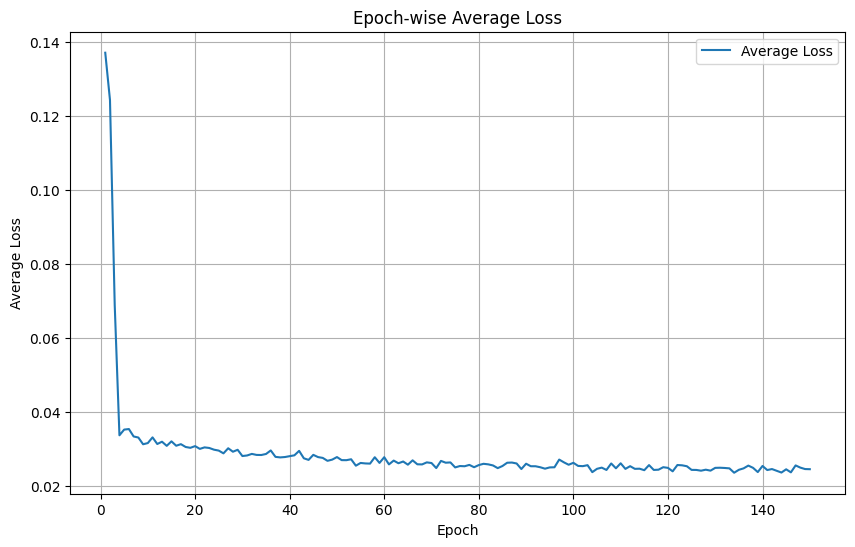

In [65]:
import json
import matplotlib.pyplot as plt

# 파일 경로
file_path = "../work_dirs/Seg_Swin_v2/batch16lr0.01epoch150/batch16lr0.01epoch150.json"

# JSON 데이터 로드
data = []
with open(file_path, "r") as f:
    for line in f:
        data.append(json.loads(line))

# 총 데이터 수와 배치 크기 설정
total_data = 7069
batch_size = 16
epochs = 150
iterations_per_epoch = (total_data + batch_size - 1) // batch_size

# epoch 별로 loss 값 계산
epoch_losses = [[] for _ in range(epochs)]
for entry in data:
    if 'iter' in entry and 'loss' in entry:
        iter_num = entry['iter']
        epoch_num = iter_num // iterations_per_epoch
        if epoch_num < epochs:
            epoch_losses[epoch_num].append(entry['loss'])

# epoch 별 평균 loss 값 계산
average_epoch_losses = [sum(losses) / len(losses) if losses else 0 for losses in epoch_losses]

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), average_epoch_losses,  label="Average Loss")
plt.xlabel("Epoch")
plt.ylabel("Average Loss")
plt.title("Epoch-wise Average Loss")
plt.legend()
plt.grid(True)
plt.show()

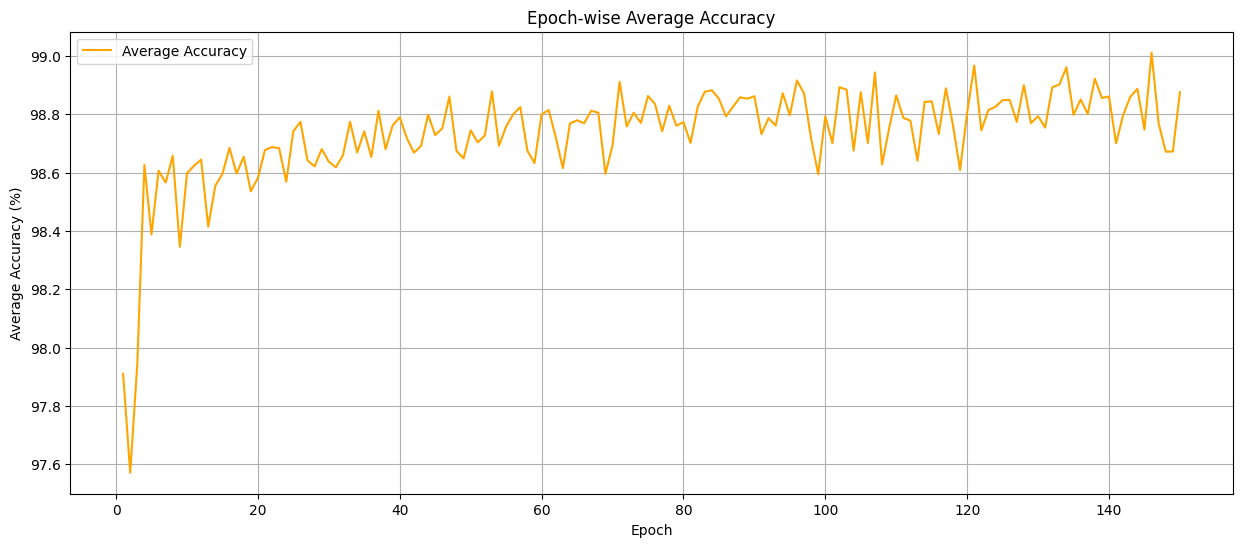

In [66]:
import json
import matplotlib.pyplot as plt

# 파일 경로
file_path = "../work_dirs/Seg_Swin_v2/batch16lr0.01epoch150/batch16lr0.01epoch150.json"

# JSON 데이터 로드
data = []
with open(file_path, "r") as f:
    for line in f:
        data.append(json.loads(line))

# 총 데이터 수와 배치 크기 설정
total_data = 7069
batch_size = 16
epochs = 150
iterations_per_epoch = (total_data + batch_size - 1) // batch_size


# epoch 별로 loss 값 계산
epoch_losses = [[] for _ in range(epochs)]
for entry in data:
    if 'iter' in entry and 'decode.acc_seg' in entry:
        iter_num = entry['iter']
        epoch_num = iter_num // iterations_per_epoch
        if epoch_num < epochs:
            epoch_accuracies[epoch_num].append(entry['decode.acc_seg'])


# epoch 별 평균 accuracy 값 계산
average_epoch_accuracies = [sum(accs) / len(accs) if accs else 0 for accs in epoch_accuracies]

# 0 값을 가진 epochs 제거
valid_epochs = [i + 1 for i, avg_acc in enumerate(average_epoch_accuracies) if avg_acc > 0]
valid_accuracies = [avg_acc for avg_acc in average_epoch_accuracies if avg_acc > 0]

# 그래프 그리기
plt.figure(figsize=(15, 6))
plt.plot(valid_epochs, valid_accuracies, color='orange', label="Average Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Average Accuracy (%)")
plt.title("Epoch-wise Average Accuracy")
plt.legend()
plt.grid(True)
plt.show()


In [63]:
import json

# Load JSON objects line by line from a file
def read_json_lines(filepath):
    data = []
    with open(filepath, 'r') as file:
        for line in file:
            data.append(json.loads(line.strip()))
    return data

# Read the JSON objects from both files
data1 = read_json_lines('../work_dirs/Seg_Swin_v2/batch16lr0.01epoch100/batch16lr0.01epoch100.json')
data2 = read_json_lines('../work_dirs/Seg_Swin_v2/batch16lr0.01epoch150/20240520_060216/vis_data/20240520_060216.json')

# Function to read JSON objects line by line from a file
def read_json_lines(filepath):
    data = []
    with open(filepath, 'r') as file:
        for line in file:
            data.append(json.loads(line.strip()))
    return data


# Merge the datasets
merged_data = filtered_data1 + filtered_data2

for i, entry in enumerate(merged_data):
    entry['iter'] = 100 * (i + 1)

# Save the sorted and reset merged dataset to a new JSON file
output_filepath = "../work_dirs/Seg_Swin_v2/batch16lr0.01epoch150/batch16lr0.01epoch150.json"
with open(output_filepath, 'w') as output_file:
    for entry in sorted_merged_data:
        output_file.write(json.dumps(entry) + '\n')

output_filepath

'../work_dirs/Seg_Swin_v2/batch16lr0.01epoch150/batch16lr0.01epoch150.json'